## Books

Contents:

__Selected queries with functions__

Five single aggregation queries that work:

1. Top 15 writers of NYT Bestsellers. Plot: bar plot
2. Number of books per each Bestsellers list. Plot: bar plot
3. Filter by Bestsellers list -> display top writers. Plot: bar plot

__All the other queries__

## Selected queries with functions

1. Top 15 writers of NYT Bestsellers across all docs, no filters 

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_68839/643053969.py:28: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="books", body=query_body)


,key,doc_count
0,Debbie Macomber,118
1,Nora Roberts,105
2,Danielle Steel,71
3,Christine Feehan,67
4,Fern Michaels,52
5,Stuart Woods,52
6,Susan Mallery,50
7,Hiro Mashima,48
8,Eiichiro Oda,46
9,Linda Lael Miller,46


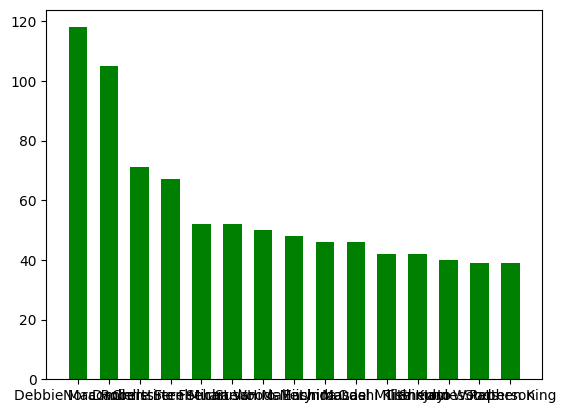

In [6]:
import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg() :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")
  
  
# Top 15 writers of NYT Bestsellers across all docs, no filters 
  query_body = {
  "size": 0,
  "aggs": {
    "per_author": {
      "terms": {
        "field": "author.keyword",
        "size": 15
      }
    }
  }
}

  result = es.search(index="books", body=query_body)
  result = json.dumps(result["aggregations"]["per_author"]["buckets"])

  #Pandas.read_json

  df = pd.read_json(result)
  display(df)

  plt.bar(df["key"], df["doc_count"] , color = 'green', width = 0.6)
  plt.show()
  #pprint(result.body)


query_agg()

2. Number of books per each Bestsellers list

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_68839/1563802735.py:34: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="books", body=query_body)


,key,doc_count
0,Hardcover Fiction,3150
1,Hardcover Nonfiction,2579
2,Combined Print and E-Book Fiction,2300
3,Trade Fiction Paperback,1907
4,Combined Print and E-Book Nonfiction,1905
5,Paperback Nonfiction,1581
6,Mass Market Paperback,1360
7,Advice How-To and Miscellaneous,1358
8,Young Adult Hardcover,1329
9,Picture Books,1112


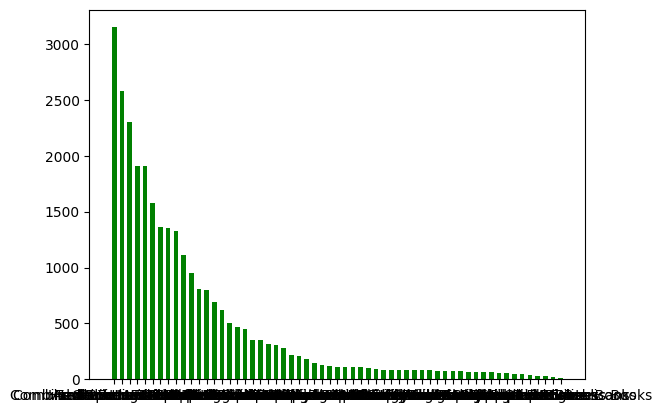

In [19]:
import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg(top: int = 59) :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")
  
  
# Number of books per each bestseller list; can change the number of lists in output
# with "top" parameter
  query_body = {
  "size": 0,
      "aggs": {
        "ranks_history": {
          "nested": {
            "path": "ranks_history"
          },
          "aggs": {
            "per_list": {
              "terms": {
                "field": "ranks_history.list_name.keyword",
                "size": top
              }
            }
          }
        }
      }
}

  result = es.search(index="books", body=query_body)
  result = json.dumps(result["aggregations"]["ranks_history"]["per_list"]["buckets"])

  #Pandas.read_json

  df = pd.read_json(result)
  display(df)

  plt.bar(df["key"], df["doc_count"] , color = 'green', width = 0.6)
  plt.show()
  #pprint(result.body)


query_agg()

3. Filter by Bestsellers list -> display top writers 

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_68839/3514453714.py:43: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="books", body=query_body)


,key,doc_count
0,Frans de Waal,2
1,Oliver Sacks,2
2,Siddhartha Mukherjee,2
3,Adam Cohen,1
4,Alexandra Horowitz,1


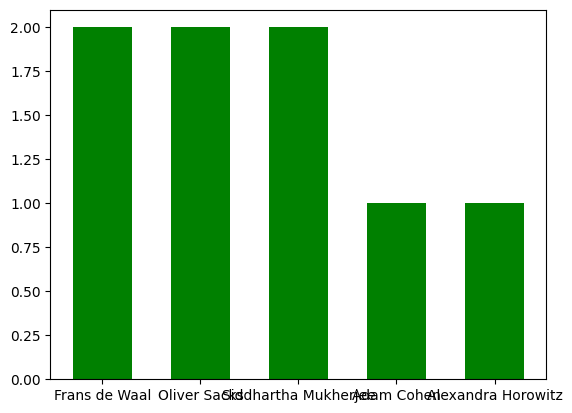

In [29]:
import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg(list: str, top: int = 10) :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")

  
# Filter by Bestsellers list -> display top writers 
  query_body = {"query": {
    "bool": {
      "filter": [
        {
          "nested": {
            "path": "ranks_history",
            "query": [
              {
                "match": {
                  "ranks_history.list_name": f"{list}"}
              }
            ]
          }  
        }
      ]  
    }
  },
  "size":0,
  "aggs": {
    "authors_per_list": {
      "terms": {
        "field": "author.keyword",
        "size": top
      }
    }
  }
}

  result = es.search(index="books", body=query_body)
  result = json.dumps(result["aggregations"]["authors_per_list"]["buckets"])

  #Pandas.read_json

  df = pd.read_json(result)
  display(df)

  plt.bar(df["key"], df["doc_count"] , color = 'green', width = 0.6)
  plt.show()
  #pprint(result.body)


query_agg("Science", 5)

## All the other queries

In [7]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

# Generic queries to display index/mapping

# show documents of an index; increment "size" argument to display more than 100 docs)
result = es.search(index="books", size=100)

# show mapping of an index
#result = es.indices.get_mapping(index="books")

# simple query to match content in a field
query_body = {"query": { "match": { "author": "Jim Wallis"}}}
# result = es.search(index="books", body=query_body)

# simple query to match content in a nested field (edit "path" and "match" fields 
# with parent and child filed names and their respective content)
nested_query_body = { "query": { "nested": { "path": "ranks_history", "query": {"bool": {"must": [{
            "match": {"ranks_history.list_name": "Hardcover Nonfiction"}}]}}}}}
#result = es.search(index="books", body=nested_query_body)

result.body

{'took': 17,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 1.0,
  'hits': [{'_index': 'books',
    '_id': 'PCiU-IgBq0sA4CEldwwF',
    '_score': 1.0,
    '_source': {'title': "AMERICA'S ORIGINAL SIN",
     'description': 'How people of spiritual faith can work together to eliminate racism and to create bridges between divided and diverse cultures.',
     'contributor': 'by Jim Wallis',
     'author': 'Jim Wallis',
     'contributor_note': '',
     'price': '0.00',
     'age_group': '',
     'publisher': 'Brazos Press',
     'isbns': [{'isbn10': '1587433427', 'isbn13': '9781587433429'}],
     'ranks_history': [],
     'reviews': [{'book_review_link': '',
       'first_chapter_link': '',
       'sunday_review_link': '',
       'article_chapter_link': ''}]}},
   {'_index': 'books',
    '_id': 'QyiU-IgBq0sA4CEldwwF',
    '_score': 1.0,
    '_source': {'title': 'AMERICAN ASSASS